In [1]:
# Run the command below if necessary, for example with Google Colab
#!pip3 install mxnet-cu110

In [2]:
# Global Libs
import matplotlib.pyplot as plt
import mxnet as mx
import numpy as np
import pandas as pd
import pickle
import random
from sklearn import datasets, metrics

# Local libs
import model

In [3]:
with open("classification_losses_sgd.pkl", "rb") as f:
    training_loss, validation_loss = pickle.load(f)

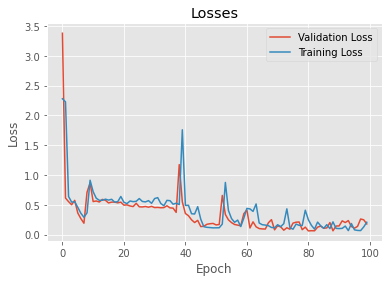

In [4]:
# plot the losses
epochs = 100

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), validation_loss[:epochs], label="Validation Loss")
plt.plot(np.arange(0, epochs), training_loss[:epochs], label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Losses")
plt.show()

In [5]:
with open("classification_losses_adam.pkl", "rb") as f:
    training_loss, validation_loss, validation_acc = pickle.load(f)

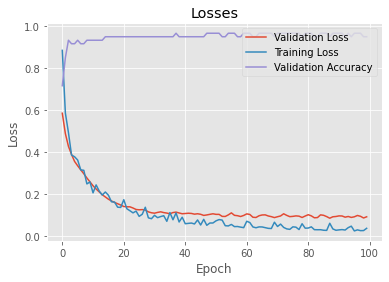

In [6]:
# plot the losses
epochs = 100

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), validation_loss[:epochs], label="Validation Loss")
plt.plot(np.arange(0, epochs), training_loss[:epochs], label="Training Loss")
plt.plot(np.arange(0, epochs), validation_acc[:epochs], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.title("Losses")
plt.show()

In [7]:
# Qualitative Evaluation

# Load Best Model
model_file_name = "classification_net.params"
ctx = mx.gpu()

net = model.create_classification_network()
net.load_parameters(model_file_name, ctx=ctx)

[19:04:33] ../src/base.cc:80: cuDNN lib mismatch: linked-against version 8101 != compiled-against version 8100.  Set MXNET_CUDNN_LIB_CHECKING=0 to quiet this warning.


In [8]:
# Loading data for evaluation
# Saving data to analyse further
with open("data_classification.pkl", "rb") as f:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(f)

with open("scaled_data_classification.pkl", "rb") as f:
    scaled_X_train, scaled_X_val, scaled_X_test = pickle.load(f)

In [9]:
random_index = random.randrange(0, len(X_test))
scaled_input = mx.nd.array([scaled_X_test[random_index]])

# Expected Output
expected_output = y_test[random_index]
print("Expected Output:", expected_output[0])

# Model Output (scaled)
output = mx.nd.softmax(net(scaled_input.as_in_context(ctx))).asnumpy()
print("Model Output:", output)

class_output = [np.argmax(output, axis=1)]
print("Class Output:", class_output[0][0])
class_output[0][0] = 0

accuracy = metrics.accuracy_score(expected_output, class_output)

print("Accuracy    :", accuracy)

Expected Output: 0
Model Output: [[9.9990225e-01 6.3888183e-05 3.3905751e-05]]
Class Output: 0
Accuracy    : 1.0


In [10]:
# Test Set Outputs
inputs = mx.nd.array(scaled_X_test)
outputs = mx.nd.softmax(net(inputs.as_in_context(ctx))).asnumpy()
class_outputs = np.argmax(outputs, axis=1)

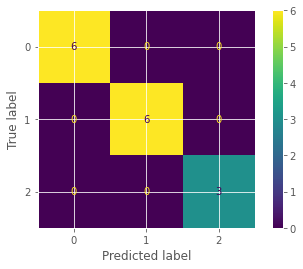

In [11]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, class_outputs)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix)
disp.plot()

In [12]:
# Accuracy using MXNet Metrics functions
test_set = mx.gluon.data.dataset.ArrayDataset(scaled_X_test, y_test)
test_data_iterator = mx.gluon.data.DataLoader(test_set, batch_size=32, shuffle=False)

ctx = mx.gpu()

acc = mx.metric.Accuracy()

for data, label in test_data_iterator:
    data = data.as_in_context(ctx)
    
    output = net(data)
    
    acc.update([label], [output])
    
print("Accuracy   :", acc.get()[1])

Accuracy   : 1.0


In [13]:
# Precision, Recall & F1-score using sklearn
precision = metrics.precision_score(y_test, class_outputs, average="macro")
recall = metrics.recall_score(y_test, class_outputs, average="macro")
f1_score = metrics.f1_score(y_test, class_outputs, average="macro")

print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1_score)

Precision  : 1.0
Recall     : 1.0
F1-score   : 1.0
